<a href="https://colab.research.google.com/github/Prasanthi2005/fmml-lab-2024/blob/main/mod3_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE: CLASSIFICATION-1
### LAB-4 : Understanding Cross-Validation and Standardization
#### Module Coordinator: Jashn Arora
---

# **Section 1: Tweaking the parameters**

Let's stat the lab by writing knn code on a cancer detection dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [2]:
cancer = datasets.load_breast_cancer(as_frame=True)

In [3]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
cancer.frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
X = cancer.data
y = cancer.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

## Section 1.1: Changing Value of K
Let's try to run the knn with different values of knn and compare the results

In [7]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

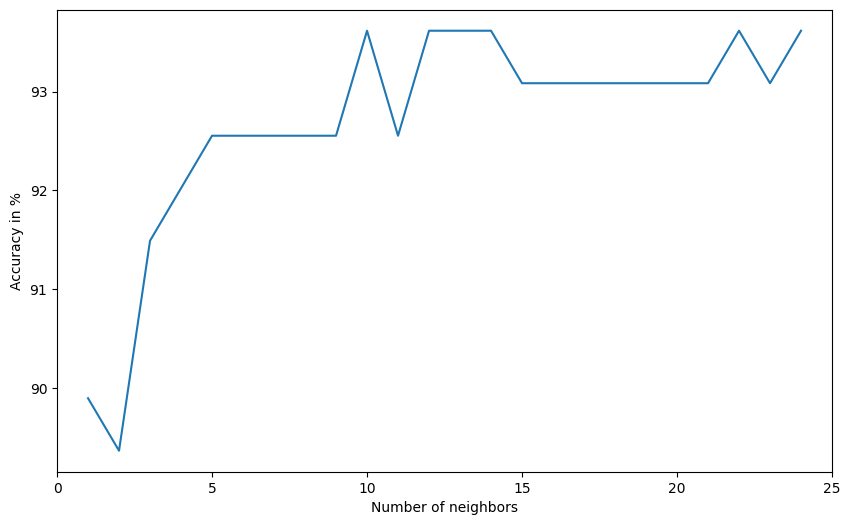

In [8]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [9]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

93.61702127659575
[10, 12, 13, 14, 22, 24]


In this case, we see that the ideal number of neighbours can take any one of the values in the list [10,12,13,14,22,24].  
However, this only tells us the effectiveness of the KNN classifier only if we have the same train-test split considered above. It still does not tell us how well the algorithm would perform if the test set were different. The results would have been different if we had split the data differently.

### AUC-ROC Curve

The AUC - ROC curve is a performance measurement for classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability.
It tells how much the model is capable of distinguishing between classes.  
The diagonal in the curve divides the ROC space. Points above the diagonal represent good classification results (better than random); points below the line represent bad results (worse than random).    
Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

The ROC curve is plotted with the TPR (True Positive Rate) on the y-axis, and the FPR (False Positive Rate) on the x-axis.

In [10]:
## AUC-ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def plot_roc(y_test,predicted):
  y_scores = predicted
  fpr, tpr, threshold = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.show()

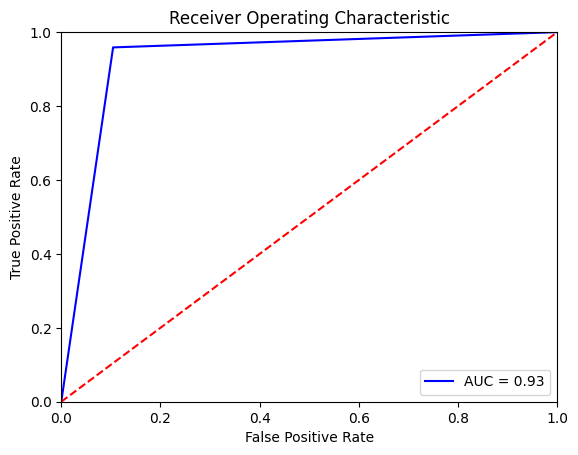

In [11]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
plot_roc(y_test,predictions)

## Section 1.2: KNN using a different train-test split

In [12]:
## Changing the random_state value here so that data is split differently
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1089)

In [13]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

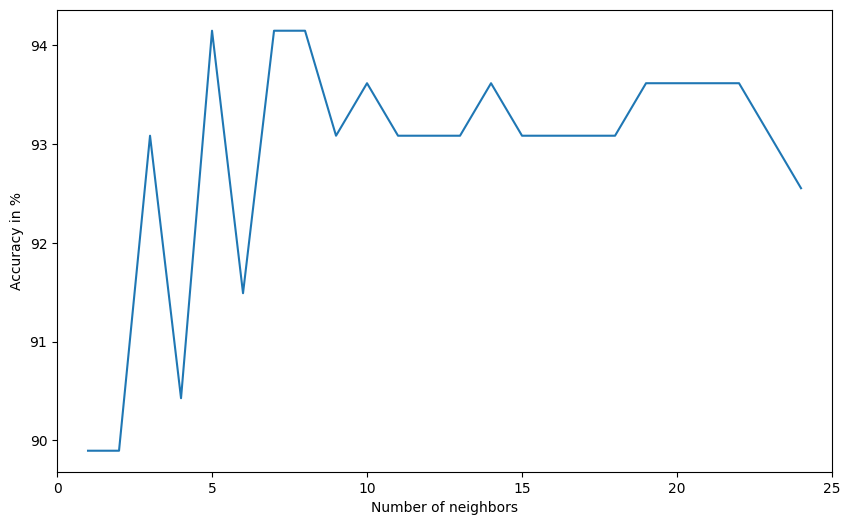

In [14]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [15]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

94.14893617021278
[5, 7, 8]


As you can see, the model gives different results when we split the data differently. Here, it suggests that the ideal k value is 5, 7 or 8.

# **Section 2: Cross Validation**

As you saw in the above two cases with different train-test splits, there is a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance.  

Cross Validation is an important technique in Machine Learning to analyze the performance of a model on **unseen** data.  

There are different kinds of cross-validation methods: exhaustive and non-exhaustive.   
Exhaustive cross-validation methods are cross-validation methods which learn and test on all possible ways to divide the original sample into a training and a validation set.
Non-exhaustive cross validation methods do not compute all ways of splitting the original sample.

One of the most commonly cross-validation methods is **K-Fold Cross validation**. The procedure for K-Fold Cross Validation is as follows:  
1. Split the dataset into k groups (typically without shuffling)
2. For each unique group:  
  a. Take the group as a hold out or test data set  
  b. Take the remaining groups as a training data set  
  c. Fit a model on the training set and evaluate it on the test set  
  d. Retain the evaluation score and discard the model  
3. Summarize the performance of the model using the mean of model evaluation scores over all the folds.

Image source: https://scikit-learn.org/stable/modules/cross_validation.html  
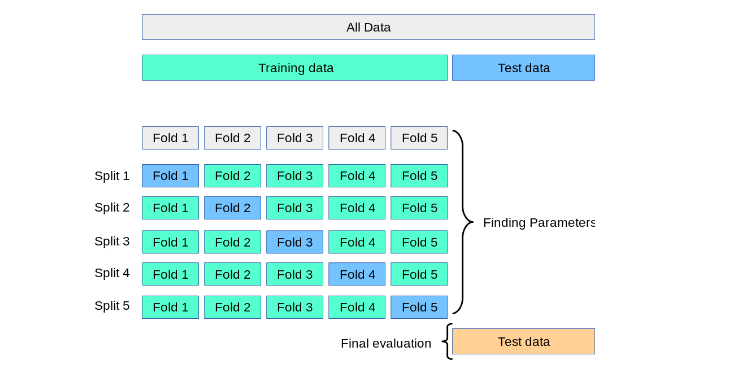

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

In [17]:
from sklearn.model_selection import KFold
from statistics import mean
kf = KFold(n_splits=10)
cv_scores = []
neighbors = []
for k in range(1,25):
  knn = KNeighborsClassifier(n_neighbors = k)
  neighbors.append(k)
  acclist = []
  for train_index, test_index in kf.split(X_train, y_train):
    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    knn.fit(x_train_fold, y_train_fold)
    acclist.append(knn.score(x_test_fold, y_test_fold))
  cv_scores.append(mean(acclist))

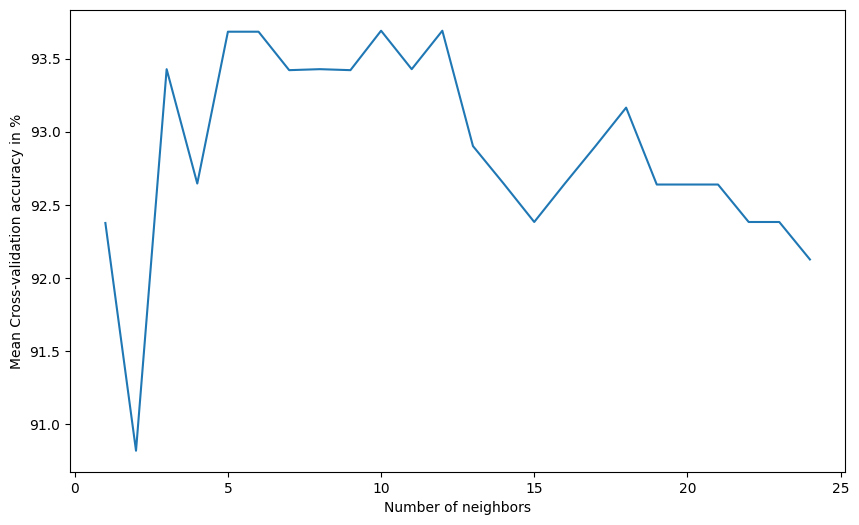

In [18]:
Accuracy = [x*100 for x in cv_scores]

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean Cross-validation accuracy in %')
plt.show()

In [19]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(optimal_ks)

[10, 12]


Note that the accuracy in the above case is not the accuracy on the test set. We plot the mean of the accuracies obtained during cross-validation, when we considered different splits of the training set.  

From the plot above, we can see that when the value of k is 10 or 12, our KNN model generalizes well to unseen data. Performing such cross validation gives us an idea about the parameters to choose when using a machine-learning algorithm.

Average Mean Squared Error (MSE): 0.19854954034729316
Average Mean Absolute Error (MAE): 0.28501021450459657
Average R-Squared (R2): -0.15049319727891178


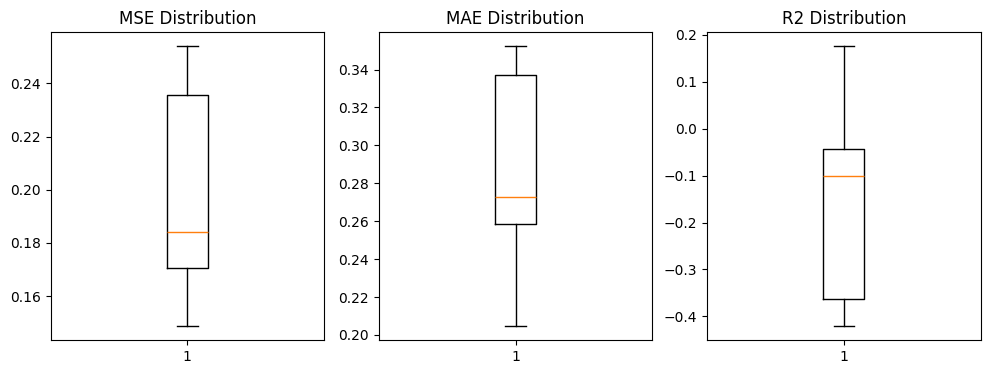

In [33]:
## TASK-1:
## In the above case, we saw K-Fold cross validation, where we split the dataset into K consecutive folds without taking anything else into account.
## Stratified KFold is another strategy that is commonly used, which preserves the percentage of samples for each class in the folds.
## Implement Stratified KFold (refer Sklearn docs) and display the results you obtain.



import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load diabetes dataset (convert to classification problem)
diabetes = load_diabetes()
X = diabetes.data
y = np.where(diabetes.target > 150, 1, 0)  # Binary classification

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale data
X_scaled = scaler.fit_transform(X)

# Initialize Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
mse_values = []
mae_values = []
r2_values = []

# Perform Stratified K-Fold cross-validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize KNN Regressor (adapted for classification)
    knn = KNeighborsRegressor(n_neighbors=5)

    # Train KNN model
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)
    y_pred_class = np.where(y_pred > 0.5, 1, 0)  # Convert to class labels

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred_class)
    r2 = r2_score(y_test, y_pred_class)

    # Append metrics to lists
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

# Calculate average metrics
avg_mse = np.mean(mse_values)
avg_mae = np.mean(mae_values)
avg_r2 = np.mean(r2_values)

# Print average metrics
print(f"Average Mean Squared Error (MSE): {avg_mse}")
print(f"Average Mean Absolute Error (MAE): {avg_mae}")
print(f"Average R-Squared (R2): {avg_r2}")

# Plot metrics distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.boxplot(mse_values)
plt.title("MSE Distribution")

plt.subplot(1, 3, 2)
plt.boxplot(mae_values)
plt.title("MAE Distribution")

plt.subplot(1, 3, 3)
plt.boxplot(r2_values)
plt.title("R2 Distribution")

plt.show()


# **Section 3: Standardization**


Scaling the data that we have available is a recommended pre-processing step when working with many machine learning algorithms. The scale and distribution of the data drawn from the domain may be different for each variable. Differences in the scales across input variables may increase the difficulty of the problem being modeled, and the model may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.  

Standardization (also called z-score normalization) is one such scaling technique that transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

$$ \text{New (scaled) value} = {X - \mu \over \sigma}$$


In [21]:
X = cancer.data
y = cancer.target

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 17)

In [24]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

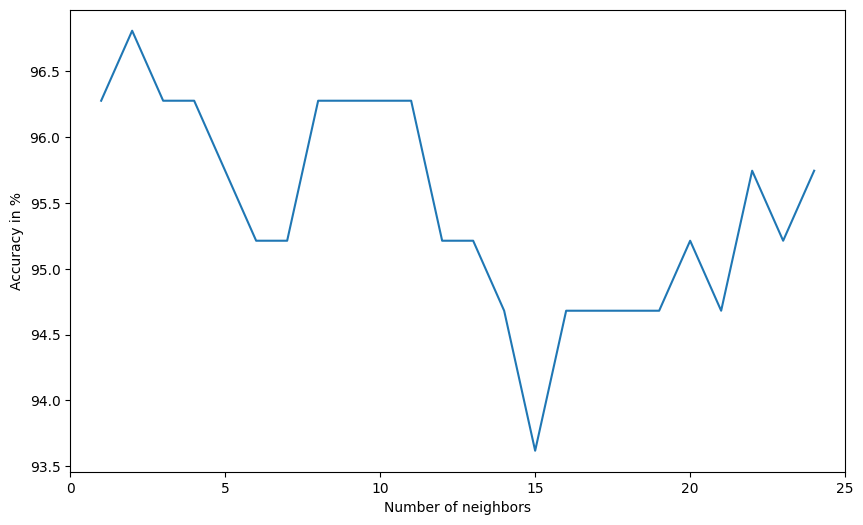

In [25]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [26]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

96.80851063829788
[2]


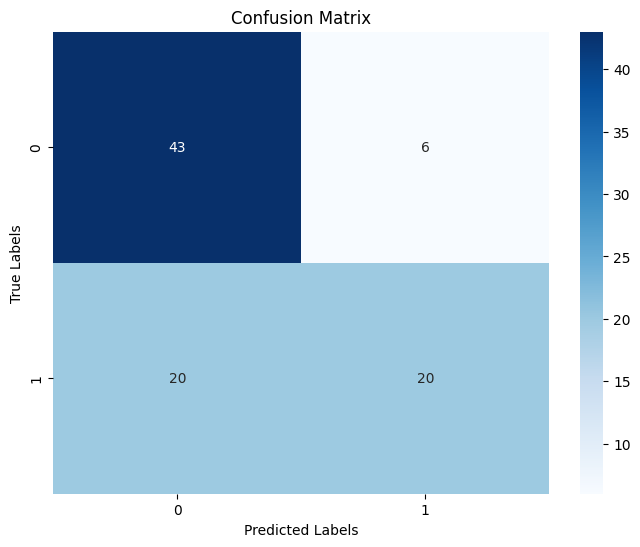

In [34]:
## TASK-2:
## Plot a confusion matrix for the classification above on the scaled data (using the optimal value of k)
## Also print out the Precision, Recall and F1-score value.



import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import seaborn as sns

# Load diabetes dataset (convert to classification problem)
diabetes = load_diabetes()
X = diabetes.data
y = np.where(diabetes.target > 150, 1, 0)  # Binary classification

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN Classifier with optimal k value (e.g., k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Train KNN model
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [37]:
## TASK-3:
## Perform K-Fold Cross validation after standardizing the data. Display your results


# Import necessary libraries
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Initialize StandardScaler
scaler = StandardScaler()

# Scale data
X_scaled = scaler.fit_transform(X)

# Initialize K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
mse_values = []
mae_values = []
r2_values = []

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize KNN Regressor
    knn = KNeighborsRegressor(n_neighbors=5)

    # Train KNN model
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append metrics to lists
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

# Calculate average metrics
avg_mse = np.mean(mse_values)
avg_mae = np.mean(mae_values)
avg_r2 = np.mean(r2_values)

# Print average metrics
print(f"Average Mean Squared Error (MSE): {avg_mse}")
print(f"Average Mean Absolute Error (MAE): {avg_mae}")
print(f"Average R-Squared (R2): {avg_r2}")

# Print metrics for each fold
for i in range(len(mse_values)):
    print(f"Fold {i+1}: MSE = {mse_values[i]:.2f}, MAE = {mae_values[i]:.2f}, R2 = {r2_values[i]:.2f}")

Average Mean Squared Error (MSE): 3565.4135056179775
Average Mean Absolute Error (MAE): 46.738733401430025
Average R-Squared (R2): 0.39025990944567973
Fold 1: MSE = 3019.08, MAE = 42.77, R2 = 0.43
Fold 2: MSE = 3987.46, MAE = 48.99, R2 = 0.36
Fold 3: MSE = 3784.96, MAE = 48.83, R2 = 0.30
Fold 4: MSE = 3778.77, MAE = 48.08, R2 = 0.44
Fold 5: MSE = 3256.79, MAE = 45.03, R2 = 0.42


Model Accuracy: 0.528


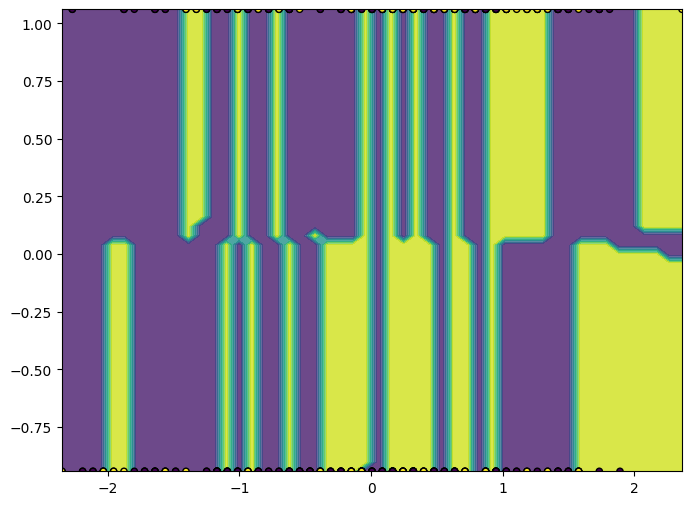

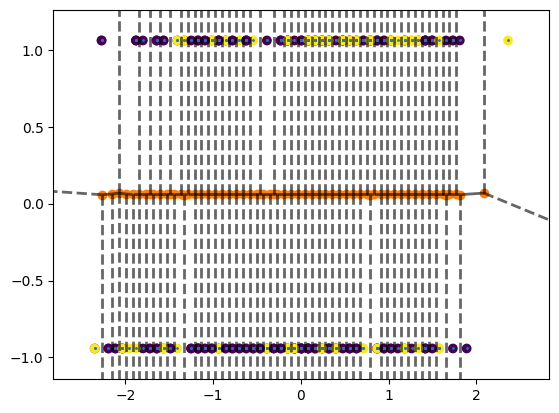

In [38]:
## TASK-4:
## Plot the vornoi and decision boundary diagram for the classifier from TASK-3



# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load diabetes dataset (convert to classification problem)
diabetes = load_diabetes()
X = diabetes.data[:, :2]  # Using only 2 features for visualization
y = np.where(diabetes.target > 150, 1, 0)  # Binary classification

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Scale data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train KNN model
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.3f}")

# Plot decision boundary
x_min, x_max = X_train_scaled[:, 0].min(), X_train_scaled[:, 0].max()
y_min, y_max = X_train_scaled[:, 1].min(), X_train_scaled[:, 1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=20, edgecolor='k')
plt.show()

# Plot Voronoi diagram
from scipy.spatial import Voronoi, voronoi_plot_2d

vor = Voronoi(X_train_scaled)
voronoi_plot_2d(vor, line_colors='black', line_width=2, line_alpha=0.6, point_size=2)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train)
plt.show()


### Questions to Think About and Answer
1. Instead of using cross-validation, we could also split our dataset into three sets- train, validation, and test set. The training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.  
What do you think are the pros/cons of this method ?
A.The method you described is called the "Holdout Method" or "Train-Validation-Test Split." Here are its pros and cons:

Pros:

1. Simple to implement.
2. Fast evaluation.
3. Less computationally expensive than cross-validation.
4. Allows for a clear separation of training, tuning, and testing phases.
5. Can be useful for large datasets where cross-validation is impractical.

Cons:

1. May not provide an accurate estimate of model performance, especially if the test set is small.
2. Sensitive to the choice of split ratio (e.g., 80% train, 10% validation, 10% test).
3. May not account for variability in the data, leading to overfitting or underfitting.
4. Only evaluates model performance on a single test set, which may not represent the entire dataset.
5. Difficult to estimate model variance and confidence intervals.
6. May require multiple iterations to find optimal hyperparameters.
7. Not suitable for small datasets, where cross-validation is preferred.

When to use:

1. Large datasets with sufficient samples.
2. Rapid prototyping and exploration.
3. Initial model evaluation and debugging.
4. When computational resources are limited.

Best practices:

1. Use stratified splitting to maintain class balance.
2. Ensure the test set is representative of the dataset.
3. Use a suitable split ratio (e.g., 80% train, 10% validation, 10% test).
4. Monitor overfitting and adjust the split ratio or model complexity accordingly.
5. Consider using cross-validation for hyperparameter tuning.

Alternatives:

1. K-Fold Cross-Validation.
2. Stratified K-Fold Cross-Validation.
3. Monte Carlo Cross-Validation.
4. Bootstrap Resampling.

In summary, the Holdout Method is a simple and efficient approach, but it may not provide the most accurate estimate of model performance. Cross-validation methods, while computationally expensive, offer more robust evaluations and are generally preferred in machine learning.
2. Is K-Fold cross validation an exhaustive or non-exhaustive cross validation method ? Justify your answer.
A.K-Fold cross-validation is a non-exhaustive cross-validation method.

Non-exhaustive methods:

- K-Fold cross-validation (K-Fold CV)
- Stratified K-Fold cross-validation (Stratified K-Fold CV)
- Monte Carlo cross-validation (MCCV)

Why non-exhaustive?

K-Fold CV is non-exhaustive because it doesn't evaluate all possible combinations of training and testing sets. Instead, it splits the data into K folds and evaluates the model K times, each time using a different fold as the test set.

Exhaustive methods:

- Leave-One-Out cross-validation (LOOCV)
- Leave-P-Out cross-validation (LPOCV)

Why exhaustive?

LOOCV, for example, is exhaustive because it evaluates all possible combinations of training and testing sets, where each sample is left out once as the test set.

Comparison:

|  | Non-Exhaustive (K-Fold CV) | Exhaustive (LOOCV) |
| --- | --- | --- |
| Computational Cost | Lower | Higher |
| Evaluation Combinations | Limited (K folds) | All possible combinations |
| Model Variance Estimation | Approximate | Exact |
| Overfitting Risk | Higher | Lower |

In summary, K-Fold CV is a non-exhaustive method that balances computational efficiency with reasonable model evaluation, while exhaustive methods like LOOCV provide more accurate estimates at the cost of increased computational expense.

### Useful Resources for further reading
1. Cross validation (scikit-learn): https://scikit-learn.org/stable/modules/cross_validation.html  
2. Wikipedia: https://en.wikipedia.org/wiki/Cross-validation_(statistics)  
3. Standardization: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/  
4. AUC-ROC : https://en.wikipedia.org/wiki/Receiver_operating_characteristic
